https://qiskit-community.github.io/qiskit-nature/tutorials/06_qubit_mappers.html?utm_source=chatgpt.com

# Theory

When atoms come together to form molecules, their atomic orbitals combine to form molecular orbitals. The arrangement and energy levels of electrons within these molecular orbitals dictate the properties of the resulting molecule and the strength of the chemical bonds. For instance, in the formation of a hydrogen molecule (H2) from two individual hydrogen atoms, the electron from each atom occupies atomic orbitals. As the atoms approach each other, these atomic orbitals overlap and combine to form new molecular orbitals — one with lower energy **(a bonding orbital)** and one with higher energy **(an anti-bonding orbital)**. 

The two electrons, one from each hydrogen atom, will preferentially occupy the lower-energy bonding orbital, leading to the formation of a stable covalent bond that holds the H2 molecule together. The energy difference between the separated atoms and the formed molecule, particularly the energy of the electrons in the molecular orbitals, determines the stability and properties of the bond.

---

We want to simulate $H_2$ on a quantum computer. The first step is to recognize that a molecule is not just a static arangement of atoms but rather a collection of electrons moving in the electric field of nuclei. The electrons will experience a Coulomb force of attraction to the nuclei and a repulsive force between each other. 

## Second quantization:

We use second quantization to describe the energies of the electrons. This is made up of two parts:

1. **Single-electron terms**: energy of an electron in an orbital, including kinetic energy and attraction to nuclei.

2. **Two-electron terms**: repulsion between pairs of electrons in different orbitals.

$$H = \sum_{p,q} h_{pq}\, a_p^\dagger a_q + \frac{1}{2} \sum_{p,q,r,s} h_{pqrs}\, a_p^\dagger a_q^\dagger a_r a_s$$


Physical interpretation:

$a_p^\dagger a_p \rightarrow$ electron sitting in orbital p

$a_p^\dagger a_q \rightarrow$ electron hopping from orbital p to orbital q

$a_p^\dagger a_q^\dagger a_r a_s \rightarrow$ electron-electron repulsion

The coefficients $h_{pq}$ and $h_{pqrs}$ are one and two-electron overlap intergrals, containing all the physical information about the molecule. 

### 1️⃣ One-electron integrals $(h_{pq}$)

* These describe the energy of a single electron moving in the **field of the nuclei**.  

* Mathematically, they are written as:  

$$
h_{pq} = \int \chi_p^*(\mathbf{r}) \left( -\frac{1}{2}\nabla^2 - \sum_A \frac{Z_A}{|\mathbf{r}-\mathbf{R}_A|} \right) \chi_q(\mathbf{r}) \, d\mathbf{r}
$$

* **Interpretation:**  
  * Diagonal ($p = q$) → energy of an electron sitting in orbital \(p\)  
  * Off-diagonal ($p \neq q$) → “hopping” energy — how likely an electron can move from orbital \(q\) to \(p\)  

---

### 2️⃣ Two-electron integrals $(h_{pqrs}$)

* These describe **electron-electron repulsion**, i.e., how the presence of one electron affects another:  

$$
h_{pqrs} = \int \int \frac{\chi_p^*(\mathbf{r}_1) \chi_q^*(\mathbf{r}_2) \chi_r(\mathbf{r}_1) \chi_s(\mathbf{r}_2)}{|\mathbf{r}_1 - \mathbf{r}_2|} \, d\mathbf{r}_1 \, d\mathbf{r}_2
$$

* **Interpretation:**  
  * Measures the Coulomb repulsion between electrons in orbitals $(p,r)$ and $(q,s)$  
  * Larger values → stronger repulsion, contributing more to the total energy  
 

---

### The role of the basis set

We now hit a practical problem: how do we **compute these integrals**? We need to know the shapes of the orbitals $\chi_p$ and $\chi_q$. This is where a **basis set** comes in.

* A **basis set** is a predefined set of functions (atomic-like orbitals) that we use to expand the molecular orbitals.  

* Common choices:  
  * **Slater-type orbitals (STO):** decay like true atomic orbitals, very accurate but harder to integrate  
  * **Gaussian-type orbitals (GTO):** decay like $e^{-\alpha r^2}$, much easier to integrate analytically  
  * **STO-nG:** approximate Slater orbitals using $n$ Gaussians (e.g., STO-6G)  

* By choosing a basis set, we **reduce the problem of computing integrals over continuous space to computing integrals over known functions**. This is what allows software like PySCF or Psi4 to output the $h_{pq}$ and $h_{pqrs}$ **numerically**.  



## Mapping from Fermions to Qubits: Jordan-Wigner Transformation

So far, we have the second-quantized Hamiltonian:

$$
H = \sum_{p,q} h_{pq}\, a_p^\dagger a_q 
    + \frac{1}{2} \sum_{p,q,r,s} h_{pqrs}\, a_p^\dagger a_q^\dagger a_r a_s
$$

Here, $a_p^\dagger$ and $a_p$ are **fermionic operators**. They follow anti-commutation rules:

$$
\{ a_p, a_q^\dagger \} = \delta_{pq}, \quad \{ a_p, a_q \} = 0
$$

Quantum computers, however, work with **qubits**, which do **not naturally obey fermionic statistics**. We need a way to represent fermionic creation and annihilation operators as qubit operators while **preserving these anti-commutation rules**. This is where the **Jordan-Wigner (JW) mapping** comes in.

---

### 4.1 The idea of the JW mapping

* Each **qubit represents a spin-orbital**:  
  * $|0\rangle$ → orbital is empty  
  * $|1\rangle$ → orbital is occupied  

* The **JW mapping** translates the fermionic operators into **Pauli matrices**:

$$
a_p^\dagger \mapsto \frac{X_p - i Y_p}{2} \otimes Z_0 Z_1 \dots Z_{p-1}, \quad
a_p \mapsto \frac{X_p + i Y_p}{2} \otimes Z_0 Z_1 \dots Z_{p-1}
$$

* The **string of Z operators** keeps track of the **fermionic sign**: whenever we swap fermions, we pick up a minus sign.  

---

### 4.2 Physical interpretation

* After mapping:  
  * **Z operators** measure occupation of an orbital  
  * **XX + YY combinations** correspond to electron hopping/exchange between orbitals  
  * **ZZ combinations** capture electron-electron interactions  

* **Crucial point:** The JW mapping **does not change the physics** — it just rewrites the Hamiltonian in a language that qubits understand.  

---

### 4.3 Example: one-electron term

Consider the diagonal term $a_0^\dagger a_0$ (electron in orbital 0). Under JW:

$$
a_0^\dagger a_0 \mapsto \frac{1 - Z_0}{2}
$$

* The coefficient $h_{00}$ from the one-electron integral remains the same.  
* The operator now **measures whether qubit 0 is in state $|1\rangle$**, corresponding to the orbital being occupied.  

Similarly, an off-diagonal hopping term $a_0^\dagger a_1 + a_1^\dagger a_0$ maps to:

$$
a_0^\dagger a_1 + a_1^\dagger a_0 \mapsto \frac{1}{2} \left( X_0 X_1 + Y_0 Y_1 \right)
$$

* This captures the **quantum mechanical possibility of electrons exchanging between orbitals**.  

---

### H₂ Hamiltonian in 4‑qubit Jordan‑Wigner form

Below is the molecular Hamiltonian for the H₂ molecule in a **4‑qubit Jordan–Wigner encoding in an STO‑6G (minimal) basis**. Each term is a Pauli string multiplied by a real coefficient, derived from the one‑ and two‑electron integrals:

$$
\begin{aligned}
H_{\text{H}_2} = & \;\alpha_0\, I\!I\!I\!I 
+ \alpha_1\, Z_0 
+ \alpha_2\, Z_1 
+ \alpha_3\, Z_2 
+ \alpha_4\, Z_3 \\
&+ \alpha_5\, Z_0Z_1
+ \alpha_6\, Z_0Z_2
+ \alpha_7\, Z_1Z_2
+ \alpha_8\, Z_0Z_3
+ \alpha_9\, Z_1Z_3
+ \alpha_{10}\, Z_2Z_3 \\
&+ \alpha_{11}\, Y_0 Y_1 X_2 X_3
+ \alpha_{12}\, X_0 Y_1 Y_2 X_3
+ \alpha_{13}\, Y_0 X_1 X_2 Y_3
+ \alpha_{14}\, X_0 X_1 Y_2 Y_3.
\end{aligned}
$$

Here:
* $I\!I\!I\!I$ is the identity on all four qubits.  
* $Z_i$, $X_i$, $Y_i$ are Pauli operators acting on qubit $i$ (with $0$ the least significant qubit).  
* Terms like $Z_0Z_1$ mean $Z$ on qubit 0 and $Z$ on qubit 1 (identity on 2 and 3).  

The $\alpha_j$ coefficients are **real numbers** that come from evaluating the integrals $h_{pq}$ and $h_{pqrs}$ for a chosen internuclear distance (typically near equilibrium). They encode all the physics of the molecule and are exactly the ones you feed into VQE. :contentReference[oaicite:0]{index=0}

In code (e.g. Qiskit), this would be represented as a list of Pauli strings with coefficients, e.g.:



In [126]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto6g",  # minimal basis
)
problem = driver.run()
fermionic_op = problem.hamiltonian.second_q_op()

mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(fermionic_op)

for pauli, coeff in qubit_jw_op.to_list():
    print(f"{pauli}  {coeff.real}")

IIII  -0.8181708140495739
IIIZ  0.17407509959369855
IIZI  -0.2242932982365726
IIZZ  0.12100990274925522
IZII  0.17407509959369855
IZIZ  0.16891402311629494
ZIII  -0.22429329823657265
ZIIZ  0.1663144133761508
YYYY  0.04530451062689558
XXYY  0.04530451062689558
YYXX  0.04530451062689558
XXXX  0.04530451062689558
IZZI  0.1663144133761508
ZIZI  0.1750445559682146
ZZII  0.12100990274925522


In [19]:
from qiskit_nature.second_q.mappers import ParityMapper

mapper = ParityMapper(num_particles=problem.num_particles)
qubit_p_op = mapper.map(fermionic_op)

for pauli, coeff in qubit_p_op.to_list():
    print(f"{pauli}  {coeff.real}")

II  -1.060190619548084
IZ  0.398368397830271
ZI  -0.39836839783027106
ZZ  -0.011329752332207954
XX  0.18121804250758228


In [63]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

h2_hamiltonian = SparsePauliOp.from_list(qubit_p_op.to_list())
 
# exact ground state energy of hamiltonian
nuclear_repulsion = 0.71997
A = np.array(h2_hamiltonian)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Electronic ground state energy (Hartree): ", min(eigenvalues).real)
print("Nuclear repulsion energy (Hartree): ", nuclear_repulsion)
print(
    "Total ground state energy (Hartree): ", min(eigenvalues).real + nuclear_repulsion
)
h2 = min(eigenvalues).real + nuclear_repulsion

Electronic ground state energy (Hartree):  -1.8659468483033672
Nuclear repulsion energy (Hartree):  0.71997
Total ground state energy (Hartree):  -1.1459768483033672


# 2 qubit ansatz

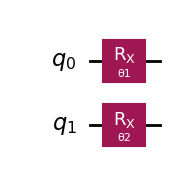

In [147]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

theta1 = Parameter("θ1")
theta2 = Parameter("θ2")

ansatz2q_1 = QuantumCircuit(2)
ansatz2q_1.rx(theta1, 0)
ansatz2q_1.rx(theta2, 1)

ansatz2q_1.draw(output='mpl')

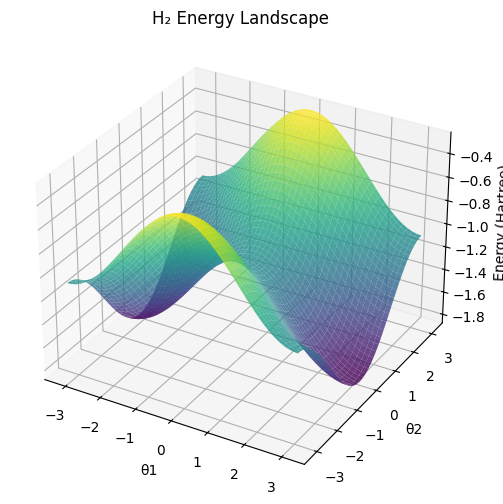

In [149]:
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

num_points = 50
theta1_vals = np.linspace(-np.pi, np.pi, num_points)
theta2_vals = np.linspace(-np.pi, np.pi, num_points)

energies_2d = np.zeros((num_points, num_points))
ansatz= ansatz2q_1

for i, t1 in enumerate(theta1_vals):
    for j, t2 in enumerate(theta2_vals):
        bind_dict = {theta1: t1, theta2: t2}
        bound_qc = ansatz.assign_parameters(bind_dict)
        state = Statevector.from_instruction(bound_qc)
        energies_2d[i, j] = state.expectation_value(qubit_p_op).real
        

T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T1, T2, energies_2d.T, cmap='viridis', alpha=0.8)

ax.set_xlabel("θ1")
ax.set_ylabel("θ2")
ax.set_zlabel("Energy (Hartree)")
ax.set_title("H₂ Energy Landscape")
plt.show()

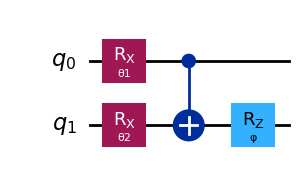

In [138]:
theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
phi = Parameter("φ")

ansatz2q_2 = QuantumCircuit(2)
ansatz2q_2.rx(theta1, 0)
ansatz2q_2.rx(theta2, 1)
ansatz2q_2.cx(0, 1)
ansatz2q_2.rz(phi, 1)

ansatz2q_2.draw(output='mpl')

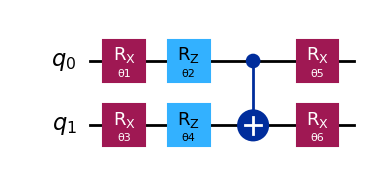

In [66]:
theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
theta3 = Parameter("θ3")
theta4 = Parameter("θ4")
theta5 = Parameter("θ5")
theta6 = Parameter("θ6")

ansatz2q_3 = QuantumCircuit(2)

# First rotation layer
ansatz2q_3.rx(theta1, 0)
ansatz2q_3.rz(theta2, 0)
ansatz2q_3.rx(theta3, 1)
ansatz2q_3.rz(theta4, 1)

# Entanglement
ansatz2q_3.cx(0, 1)

# Second rotation layer
ansatz2q_3.rx(theta5, 0)
ansatz2q_3.rx(theta6, 1)

ansatz2q_3.draw(output='mpl')

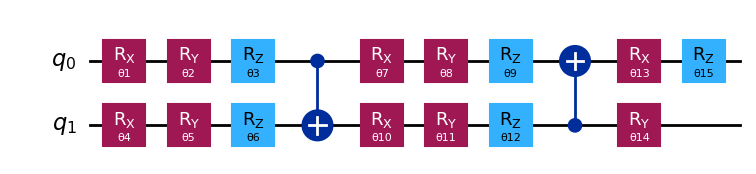

In [82]:
# 2-qubit SU(4) ansatz with 15 parameters
params = [Parameter(f"θ{i}") for i in range(1, 16)]

ansatz_su4 = QuantumCircuit(2)

# Layer 1: independent single-qubit rotations
ansatz_su4.rx(params[0], 0)
ansatz_su4.ry(params[1], 0)
ansatz_su4.rz(params[2], 0)

ansatz_su4.rx(params[3], 1)
ansatz_su4.ry(params[4], 1)
ansatz_su4.rz(params[5], 1)

# Entangling layer
ansatz_su4.cx(0, 1)

# Layer 2: more single-qubit rotations
ansatz_su4.rx(params[6], 0)
ansatz_su4.ry(params[7], 0)
ansatz_su4.rz(params[8], 0)

ansatz_su4.rx(params[9], 1)
ansatz_su4.ry(params[10], 1)
ansatz_su4.rz(params[11], 1)

# Optional second entangler + final rotations to reach 15 parameters
ansatz_su4.cx(1, 0)
ansatz_su4.rx(params[12], 0)
ansatz_su4.ry(params[13], 1)
ansatz_su4.rz(params[14], 0)

ansatz_su4.draw(output='mpl')

Backend: {config.backend_name}
Native gates:  ['cx', 'id', 'delay', 'measure', 'reset', 'rz', 'sx', 'x', 'if_else', 'for_loop', 'switch_case'] ,


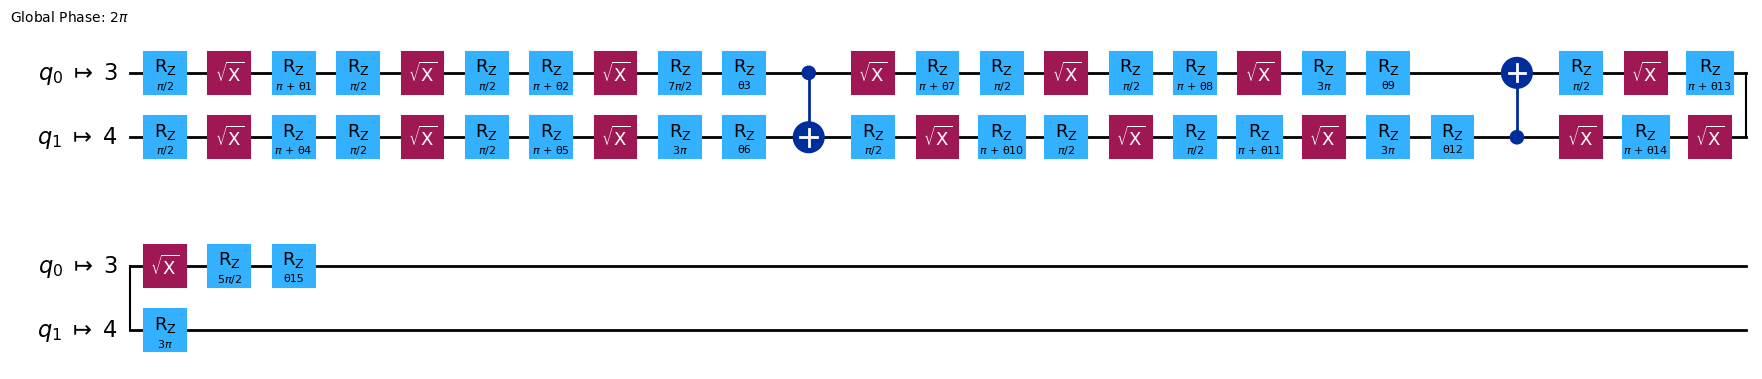

In [114]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

fake_backend = FakeManilaV2() 
noise_model = NoiseModel.from_backend(fake_backend)
 
# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
config = fake_backend.configuration()
 
print("Backend: {config.backend_name}")
print("Native gates: ", config.supported_instructions, ",")
 
 
target = fake_backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz=ansatz_su4
ansatz_isa = pm.run(ansatz)
ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [115]:
h2_hamiltonian_isa = h2_hamiltonian.apply_layout(layout=ansatz_isa.layout)

In [116]:
x0 = [0]*len(ansatz.parameters)
x0[0] = 2

In [117]:
def cost_func(params, ansatz, hamiltonian, estimator, cost_history_dict):
    """Return estimate of energy from estimator
 
    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results
 
    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]
 
    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")
 
    return energy

In [118]:
from scipy.optimize import minimize
from qiskit_ibm_runtime import EstimatorV2 as Estimator

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}
estimator = Estimator(backend_sim)
estimator.options.default_shots = 10000
 
iterations = 100 
res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa, h2_hamiltonian_isa, estimator, cost_history_dict),
    method="cobyla",
    options={"maxiter": iterations, "tol": 1e-12},
)

Iters. done: 1 [Current cost: -0.5118962205225228]
Iters. done: 2 [Current cost: -0.28932309347891616]
Iters. done: 3 [Current cost: -0.7664405531112397]
Iters. done: 4 [Current cost: -0.9199091873195444]
Iters. done: 5 [Current cost: -0.9725017965822517]
Iters. done: 6 [Current cost: -0.7751537850117761]
Iters. done: 7 [Current cost: -0.9835467808008747]
Iters. done: 8 [Current cost: -0.9444872025122234]
Iters. done: 9 [Current cost: -0.9773231229993731]
Iters. done: 10 [Current cost: -0.9934618751565946]
Iters. done: 11 [Current cost: -1.3590394539363149]
Iters. done: 12 [Current cost: -1.2100646907204096]
Iters. done: 13 [Current cost: -0.9737505212143838]
Iters. done: 14 [Current cost: -1.3119354732678254]
Iters. done: 15 [Current cost: -0.8207620569291045]
Iters. done: 16 [Current cost: -1.0864534070069147]
Iters. done: 17 [Current cost: -1.7046148043372402]
Iters. done: 18 [Current cost: -1.5071968296359302]
Iters. done: 19 [Current cost: -1.6194040679107156]
Iters. done: 20 [Cur

In [119]:
h_vqe = res.fun
print("The reference ground state energy is ", min(eigenvalues).real)
print("The computed ground state energy is ", h_vqe)

The reference ground state energy is  -1.8659468483033672
The computed ground state energy is  -1.8200767245729672


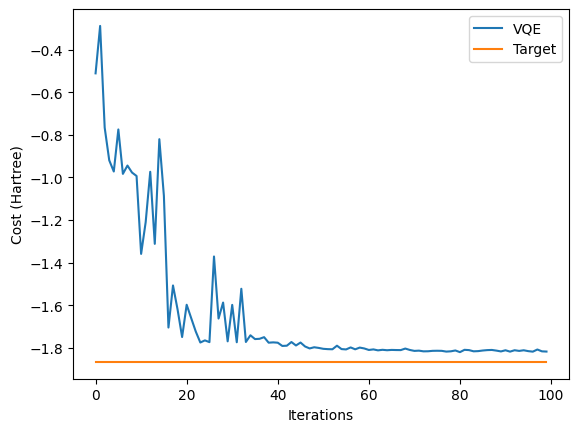

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0, 10, iterations)
 
# Define the constant function
y_constant = np.full_like(x, min(eigenvalues.real))
ax.plot(
    range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label="VQE"
)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost (Hartree)")
ax.plot(y_constant, label="Target")
plt.legend()
plt.draw()

# Energies landscape

# Appendix

In [22]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, DensityMatrix, Pauli
 
theta = Parameter("θ")
phi = Parameter("φ")
lam = Parameter("λ")
 
ansatz1 = QuantumCircuit(1)
ansatz1.rx(theta, 0)
 
ansatz2 = QuantumCircuit(1)
ansatz2.rx(theta, 0)
ansatz2.rz(phi, 0)
 
ansatz3 = QuantumCircuit(1)
ansatz3.rx(theta, 0)
ansatz3.rz(phi, 0)
ansatz3.rx(lam, 0)

In [51]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_bloch(bloch_vectors):
    # Extract X, Y, Z coordinates for 3D projection
    X_coords = bloch_vectors[:, 0]
    Z_coords = bloch_vectors[:, 2]
 
    # Compute Y coordinates from X and Z to approximate the full Bloch sphere projection
    Y_coords = bloch_vectors[:, 1]
 
    # Create 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X_coords, Y_coords, Z_coords, color="blue", alpha=0.6)
 
    # Labels and title
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Parameterized 1-Qubit Circuit on 3D Bloch Sphere")
 
    # Set axis limits and make them equal
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
 
    # Ensure equal aspect ratio for all axes
    ax.set_box_aspect([1, 1, 1])  # Equal scaling for x, y, z axes
 
    # Show grid
    ax.grid(True)
 
    plt.show()

def generate_bloch_vectors(ansatz, parameters, parameter_vals):
    
    num_samples = len(parameter_vals[0])
    bloch_vectors = []

    for i in range(num_samples):
        bind_dict = {
            param: values[i]
            for param, values in zip(parameters, parameter_vals)
        }

        bound_qc = ansatz.assign_parameters(bind_dict)
        state = Statevector.from_instruction(bound_qc)

        X = state.expectation_value(Pauli("X")).real
        Y = state.expectation_value(Pauli("Y")).real
        Z = state.expectation_value(Pauli("Z")).real

        bloch_vectors.append([X, Y, Z])
    
    bloch_vectors=np.array(bloch_vectors)

    plot_bloch(bloch_vectors)

    return np.array(bloch_vectors)

In [52]:
num_samples = 5000  # Number of random states
theta_vals = np.random.uniform(0, 2 * np.pi, num_samples)
phi_vals = np.random.uniform(0, 2 * np.pi, num_samples)
lam_vals = np.random.uniform(0, 2 * np.pi, num_samples)

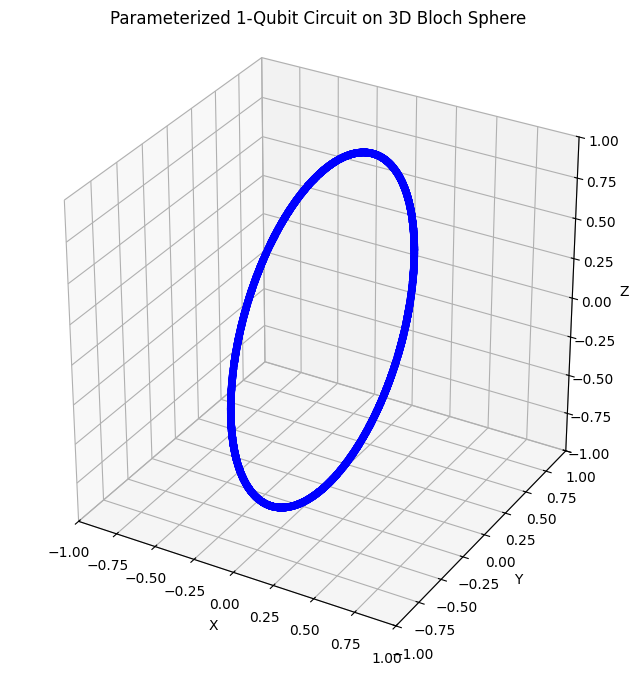

array([[ 0.        ,  0.68925044, -0.72452317],
       [ 0.        ,  0.4307724 , -0.9024606 ],
       [ 0.        , -0.46174971,  0.88701026],
       ...,
       [ 0.        ,  0.9728543 ,  0.23141847],
       [ 0.        ,  0.87523095, -0.48370527],
       [ 0.        , -0.5389365 ,  0.8423464 ]], shape=(5000, 3))

In [53]:
generate_bloch_vectors(ansatz=ansatz1, parameters=[theta], parameter_vals=[theta_vals])

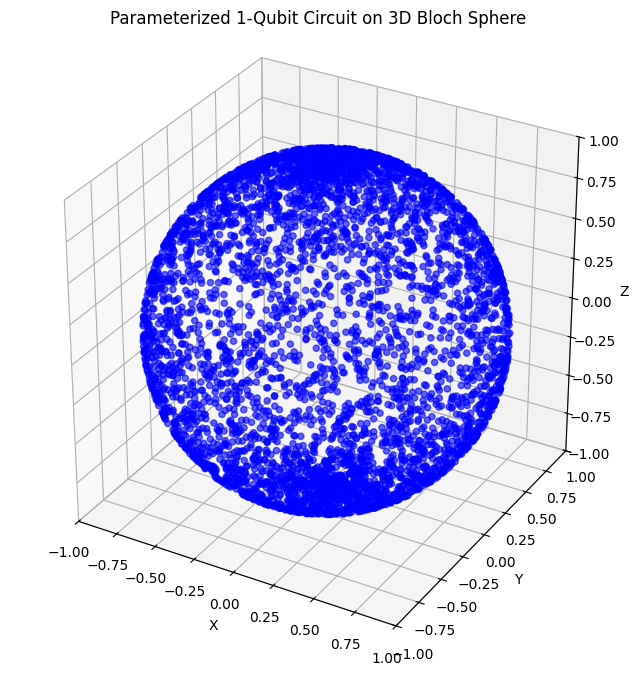

array([[-0.40889052,  0.55486459, -0.72452317],
       [-0.42000128, -0.09572769, -0.9024606 ],
       [-0.34676143,  0.30490868,  0.88701026],
       ...,
       [ 0.50661555,  0.83053367,  0.23141847],
       [-0.51463644,  0.70793965, -0.48370527],
       [-0.2920327 , -0.45295635,  0.8423464 ]], shape=(5000, 3))

In [54]:
generate_bloch_vectors(ansatz=ansatz2, parameters=[phi, theta], parameter_vals=[phi_vals, theta_vals])

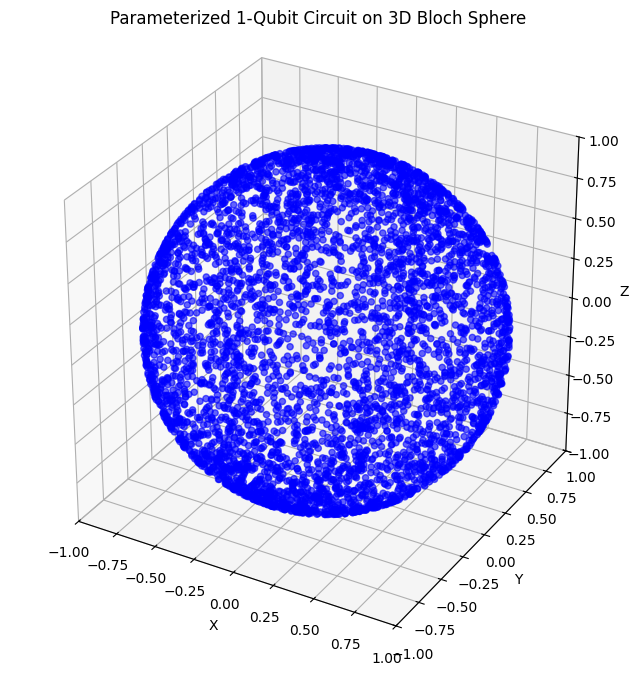

array([[-0.40889052, -0.45999248, -0.78817223],
       [-0.42000128, -0.87130032, -0.25383986],
       [-0.34676143,  0.80067155, -0.48855048],
       ...,
       [ 0.50661555,  0.52603842, -0.68309902],
       [-0.51463644,  0.79166053, -0.32927639],
       [-0.2920327 , -0.22210845,  0.93026058]], shape=(5000, 3))

In [56]:
generate_bloch_vectors(ansatz=ansatz3, parameters=[phi, theta, lam], parameter_vals=[phi_vals, theta_vals, lam_vals])

This circuit has  3 parameters


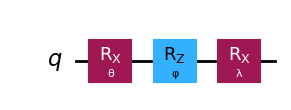

In [57]:
# Pre-defined ansatz circuit and operator class for Hamiltonian
 
ansatz = ansatz3
 
num_params = ansatz.num_parameters
print("This circuit has ", num_params, "parameters")
 
ansatz.draw("mpl", style="iqp")